In [5]:
using Revise

using RigidBodyDynamics
using RigidBodyDynamics: Bounds

using DrakeVisualizer
using Plots
using RigidBodyTreeInspector

using BilevelTrajOpt
gr(size=(500,500), html_output_format=:png);

In [6]:
urdf = joinpath("..", "urdf", "ball.urdf")
mechanism = parse_urdf(Float64, urdf)
body = findbody(mechanism, "ball")
basejoint = joint_to_parent(body, mechanism)
floatingjoint = Joint(basejoint.name, frame_before(basejoint), frame_after(basejoint), QuaternionFloating{Float64}())
replace_joint!(mechanism, basejoint, floatingjoint)
position_bounds(floatingjoint) .= Bounds(-100, 100)
velocity_bounds(floatingjoint) .= Bounds(-100, 100)
μ = 0.5
motion_type = :xyz
point = Point3D(default_frame(findbody(mechanism, "floor")), [0.,0.,0.])
normal = FreeVector3D(default_frame(findbody(mechanism, "floor")), [0.,0.,1.])
hs = HalfSpace(point, normal)
floor = Obstacle(hs, μ, motion_type)
obstacles = [floor]
env = parse_contacts(mechanism, urdf, obstacles)
x0 = MechanismState(mechanism)
Δt = 0.005;

In [7]:
# q0 = [1., 0., 0., 0., 0., 0., 0.005]
q0 = [1., 0., 0., 0., 0., 0., 0.]
v0 = [0., 0., 0., 0.1, 0. , 0.]
N = 5

set_configuration!(x0, q0)
set_velocity!(x0, v0)
setdirty!(x0)

ctrl! = (u,t,x) -> u[:] = 0.

(::#1) (generic function with 1 method)

In [13]:
println("Implicit Contacts")
traj_imp = BilevelTrajOpt.simulate(x0,env,Δt,N,ctrl!,implicit_contact=true);

19-element Array{Float64,1}:
 1.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.1
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

Implicit Contacts


LoadError: [91mMethodError: no method matching svdfact!(::Array{ForwardDiff.Dual{ForwardDiff.Tag{BilevelTrajOpt.##67#77{BilevelTrajOpt.#eval_g#68{BilevelTrajOpt.SimData,Array{Float64,1},Array{Float64,1},Array{Float64,1},Array{Float64,1},Array{Float64,1},Array{Float64,1},Symmetric{Float64,Array{Float64,2}}}},Float64},Float64,10},2}; thin=true)[0m
Closest candidates are:
  svdfact!([91m::Base.LinAlg.AbstractTriangular[39m) at linalg/triangular.jl:2204[91m got unsupported keyword argument "thin"[39m
  svdfact!([91m::Union{Base.ReshapedArray{T<:Union{Complex{Float32}, Complex{Float64}, Float32, Float64},2,A,MI} where MI<:Tuple{Vararg{Base.MultiplicativeInverses.SignedMultiplicativeInverse{Int64},N} where N} where A<:Union{DenseArray, SubArray{T,N,P,I,true} where I<:Tuple{Union{Base.Slice, UnitRange},Vararg{Any,N} where N} where P where N where T}, DenseArray{T<:Union{Complex{Float32}, Complex{Float64}, Float32, Float64},2}, SubArray{T<:Union{Complex{Float32}, Complex{Float64}, Float32, Float64},2,A,I,L} where L} where I<:Tuple{Vararg{Union{Base.AbstractCartesianIndex, Int64, Range{Int64}},N} where N} where A<:Union{Base.ReshapedArray{T,N,A,MI} where MI<:Tuple{Vararg{Base.MultiplicativeInverses.SignedMultiplicativeInverse{Int64},N} where N} where A<:Union{DenseArray, SubArray{T,N,P,I,true} where I<:Tuple{Union{Base.Slice, UnitRange},Vararg{Any,N} where N} where P where N where T} where N where T, DenseArray}[39m; thin) where T<:Union{Complex{Float32}, Complex{Float64}, Float32, Float64} at linalg/svd.jl:20
  svdfact!([91m::Union{Base.ReshapedArray{T<:Union{Complex{Float32}, Complex{Float64}, Float32, Float64},2,A,MI} where MI<:Tuple{Vararg{Base.MultiplicativeInverses.SignedMultiplicativeInverse{Int64},N} where N} where A<:Union{DenseArray, SubArray{T,N,P,I,true} where I<:Tuple{Union{Base.Slice, UnitRange},Vararg{Any,N} where N} where P where N where T}, DenseArray{T<:Union{Complex{Float32}, Complex{Float64}, Float32, Float64},2}, SubArray{T<:Union{Complex{Float32}, Complex{Float64}, Float32, Float64},2,A,I,L} where L} where I<:Tuple{Vararg{Union{Base.AbstractCartesianIndex, Int64, Range{Int64}},N} where N} where A<:Union{Base.ReshapedArray{T,N,A,MI} where MI<:Tuple{Vararg{Base.MultiplicativeInverses.SignedMultiplicativeInverse{Int64},N} where N} where A<:Union{DenseArray, SubArray{T,N,P,I,true} where I<:Tuple{Union{Base.Slice, UnitRange},Vararg{Any,N} where N} where P where N where T} where N where T, DenseArray}[39m, [91m::Union{Base.ReshapedArray{T<:Union{Complex{Float32}, Complex{Float64}, Float32, Float64},2,A,MI} where MI<:Tuple{Vararg{Base.MultiplicativeInverses.SignedMultiplicativeInverse{Int64},N} where N} where A<:Union{DenseArray, SubArray{T,N,P,I,true} where I<:Tuple{Union{Base.Slice, UnitRange},Vararg{Any,N} where N} where P where N where T}, DenseArray{T<:Union{Complex{Float32}, Complex{Float64}, Float32, Float64},2}, SubArray{T<:Union{Complex{Float32}, Complex{Float64}, Float32, Float64},2,A,I,L} where L} where I<:Tuple{Vararg{Union{Base.AbstractCartesianIndex, Int64, Range{Int64}},N} where N} where A<:Union{Base.ReshapedArray{T,N,A,MI} where MI<:Tuple{Vararg{Base.MultiplicativeInverses.SignedMultiplicativeInverse{Int64},N} where N} where A<:Union{DenseArray, SubArray{T,N,P,I,true} where I<:Tuple{Union{Base.Slice, UnitRange},Vararg{Any,N} where N} where P where N where T} where N where T, DenseArray}[39m) where T<:Union{Complex{Float32}, Complex{Float64}, Float32, Float64} at linalg/svd.jl:197[91m got unsupported keyword argument "thin"[39m
  ...[39m

In [8]:
println("Explicit Contacts")
traj_exp = BilevelTrajOpt.simulate(x0,env,Δt,N,ctrl!,implicit_contact=false);

Explicit Contacts
elapsed time: 137.132422711 seconds
elapsed time: 0.027518419 seconds

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt
******************************************************************************

elapsed time: 0.017489856 seconds
elapsed time: 0.033624668 seconds
elapsed time: 0.054792904 seconds
elapsed time: 0.074861825 seconds
elapsed time: 0.036892436 seconds
elapsed time: 0.032217669 seconds
elapsed time: 0.027680029 seconds
elapsed time: 0.065733802 seconds
elapsed time: 0.012051595 seconds
elapsed time: 0.028770254 seconds
elapsed time: 0.03412752 seconds
elapsed time: 0.061277711 seconds
elapsed time: 0.04415214 seconds
elapsed time: 0.009026114 seconds
elapsed time: 0.053560504 seconds
elapsed time: 0.

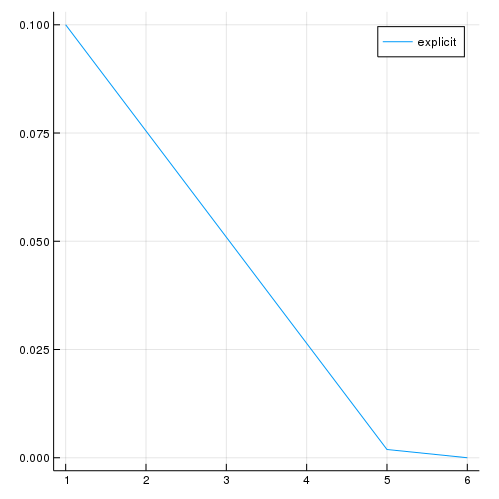

In [12]:
ts = cumsum([Δt for i in 1:N]);
j = 11
plot(traj_exp[j,:],label="explicit")
# plot!(traj_imp[j,:],label="implicit")